<a href="https://colab.research.google.com/github/Jacobanderson42/Project2/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloads the files from github and separates data and assigns a color based on rain rate and wind speed. Then plots rain rate and wind speed for each location.

In [0]:
def MetPlot(file_names,all_filenames,rain_cutoff,wind_cutoff):
  import pandas as pd
  import numpy as np
  import math
  import datetime as dt
  import matplotlib.dates as md
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  time = []
  east = []
  north = []
  rain = []
  for f in range(len(file_names)):
    files = all_filenames[f]
    url = [file_names[f]+i for i in files]
    combined_csv = pd.concat([pd.read_csv(t) for t in url],sort=False)
    t = np.array(combined_csv['time'])
    e = np.array(combined_csv['eastward_wind_velocity'])
    n = np.array(combined_csv['northward_wind_velocity'])
    r = np.array(combined_csv['precipitation'])

    t = np.delete(t,np.argwhere(np.isnan(e)))
    n = np.delete(n,np.argwhere(np.isnan(e)))
    r = np.delete(r,np.argwhere(np.isnan(e)))
    e = np.delete(e,np.argwhere(np.isnan(e)))

    t = np.delete(t,np.argwhere(np.isnan(n)))
    r = np.delete(r,np.argwhere(np.isnan(n)))
    e = np.delete(e,np.argwhere(np.isnan(n))) 
    n = np.delete(n,np.argwhere(np.isnan(n))) 

    time.append(t)
    east.append(e)
    north.append(n)
    rain.append(r)

  win = []
  for f in range(len(file_names)):
    w = [math.sqrt(east[f][i]**2+north[f][i]**2) for i in range(len(east[f]))]
    win.append(w)

  dates = []
  timestamps = []
  for f in range(len(file_names)):
    t = time[f]-2.208e+9
    d=[dt.datetime.fromtimestamp(ts) for ts in t]
    datenums=md.date2num(d)
    dates.append(datenums)
    timestamps.append(t)

  rain_rate = []
  for f in range(len(file_names)):
    rr = (np.diff(rain[f])/np.diff(time[f]))*3600
    rr[rr < 0] = 0
    rain_rate.append(rr)

  date = []
  wind = []
  times = []
  for f in range(len(file_names)):
    d = dates[f][:-1]
    date.append(d)
    t = time[f][:-1]
    times.append(t)
    w = win[f][:-1]
    wind.append(w)

  col = []
  c = []
  for f in range(len(file_names)):
    for i in range(len(date[f])):
      if wind[f][i] > wind_cutoff and rain_rate[f][i] > rain_cutoff:
        c.append('r')
      elif wind[f][i] > wind_cutoff and rain_rate[f][i] < rain_cutoff:
        c.append('g')
      elif wind[f][i] < wind_cutoff and rain_rate[f][i] > rain_cutoff:
        c.append('b')
      else:
        c.append('y')
    col.append(c)
    c = []

  for i in range(len(file_names)):
    n = file_names[i][66:-1]
    name = n.replace('%20',' ')

    plt.figure(figsize=(12, 8))
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(xfmt)
    plt.scatter(date[i],wind[i],c=col[i],s=.6)
    red_patch = mpatches.Patch(color='r', label='windy and rainy')
    green_patch = mpatches.Patch(color='g', label='windy not rainy')
    blue_patch = mpatches.Patch(color='b', label='rain not windy')
    yellow_patch = mpatches.Patch(color='y', label='not windy not rainy')
    plt.legend(handles=[red_patch,green_patch,blue_patch,yellow_patch])
    plt.title(name+' Wind')
    plt.xlabel('Date')
    plt.ylabel('Wind (m/s)')

    plt.figure(figsize=(12, 8))
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(xfmt)
    plt.scatter(date[i],rain_rate[i],c=col[i],s=.6)
    red_patch = mpatches.Patch(color='r', label='windy and rainy')
    green_patch = mpatches.Patch(color='g', label='windy not rainy')
    blue_patch = mpatches.Patch(color='b', label='rain not windy')
    yellow_patch = mpatches.Patch(color='y', label='not windy not rainy')
    plt.legend(handles=[red_patch,green_patch,blue_patch,yellow_patch])
    plt.title(name+ ' Rain')
    plt.xlabel('Date')
    plt.ylabel('Rain (mm/hr)')
    plt.show()


Downloads the files from github and separates data then finds a cross correlation for the wind and rain data between the two locations.

In [0]:
def MetCorr(file_names,all_filenames,start_date,stop_date):
  import pandas as pd
  import numpy as np
  import math
  import datetime as dt
  import matplotlib.dates as md
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  time = []
  east = []
  north = []
  rain = []
  for f in range(len(file_names)):
    files = all_filenames[f]
    url = [file_names[f]+i for i in files]
    combined_csv = pd.concat([pd.read_csv(t) for t in url],sort=False)
    t = np.array(combined_csv['time'])
    e = np.array(combined_csv['eastward_wind_velocity'])
    n = np.array(combined_csv['northward_wind_velocity'])
    r = np.array(combined_csv['precipitation'])

    t = np.delete(t,np.argwhere(np.isnan(e)))
    n = np.delete(n,np.argwhere(np.isnan(e)))
    r = np.delete(r,np.argwhere(np.isnan(e)))
    e = np.delete(e,np.argwhere(np.isnan(e)))

    t = np.delete(t,np.argwhere(np.isnan(n)))
    r = np.delete(r,np.argwhere(np.isnan(n)))
    e = np.delete(e,np.argwhere(np.isnan(n))) 
    n = np.delete(n,np.argwhere(np.isnan(n))) 

    time.append(t)
    east.append(e)
    north.append(n)
    rain.append(r)

  win = []
  for f in range(len(file_names)):
    w = [math.sqrt(east[f][i]**2+north[f][i]**2) for i in range(len(east[f]))]
    win.append(w)

  dates = []
  timestamps = []
  for f in range(len(file_names)):
    t = time[f]-2.208e+9
    d=[dt.datetime.fromtimestamp(ts) for ts in t]
    datenums=md.date2num(d)
    dates.append(datenums)
    timestamps.append(t)

  rain_rate = []
  for f in range(len(file_names)):
    rr = (np.diff(rain[f])/np.diff(time[f]))*3600
    rr[rr < 0] = 0
    rain_rate.append(rr)

  date = []
  wind = []
  times = []
  for f in range(len(file_names)):
    d = dates[f][:-1]
    date.append(d)
    t = time[f][:-1]
    times.append(t)
    w = win[f][:-1]
    wind.append(w)

  time_interp = []
  wind_interp = []
  rain_interp = []

  for f in range(len(file_names)):
    min_time = int(dt.datetime.strptime(start_date, "%m/%d/%Y").timestamp()+2.208e+9)
    max_time = int(dt.datetime.strptime(stop_date, "%m/%d/%Y").timestamp()+2.208e+9)
    if min_time < (max([min(time[i]) for i in range(len(time))])) or max_time > (min([max(time[i]) for i in range(len(time))])):
      return 'start date or stop date is outside of the range of data'
    nt = (max_time-min_time)
    tnew = range(min_time,max_time)
    time_interp.append(tnew)
    windnew = np.interp(tnew, times[f], wind[f])
    wind_interp.append(windnew)
    rainnew = np.interp(tnew, times[f], rain_rate[f])
    rain_interp.append(rainnew)


  y1 = wind_interp[0]
  y2 = wind_interp[1]
  lags_wind = np.arange(-nt + 1, nt)
  ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
  ccor_wind = ccov / (nt * y1.std() * y2.std())
  plt.figure(figsize=(12, 8))
  plt.plot(lags_wind, ccor_wind, label='wind')

  y3 = rain_interp[0]
  y4 = rain_interp[1]
  lags_rain = np.arange(-nt + 1, nt)
  ccov = np.correlate(y3 - y3.mean(), y4 - y4.mean(), mode='full')
  ccor_rain = ccov / (nt * y3.std() * y4.std())
  plt.plot(lags_rain, ccor_rain, label='rain')
  plt.legend(loc='best')
  plt.title('Cross Correlation')
  plt.xlabel('Delay (s)')

  max_wind = max(ccor_wind)
  max_rain = max(ccor_rain)
  maxlag_wind = lags_wind[np.argmax(ccor_wind)]
  maxlag_rain = lags_rain[np.argmax(ccor_rain)]
  print('max correlation for wind is {} and at a lag of {} seconds'.format(max_wind,maxlag_wind))
  print('max correlation for rain is {} and at a lag of {} seconds'.format(max_rain,maxlag_rain))
  plt.show()

Downloads files from github and separates data. Then calculates the average rain rate and wind speed for each location and plots. Also finds the max and min of each and the month in which that occurs.

In [0]:
def MetAve(file_names,all_filenames):
  import pandas as pd
  import numpy as np
  import math
  import datetime as dt
  import matplotlib.dates as md
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  time = []
  east = []
  north = []
  rain = []
  leg_names = []
  for f in range(len(file_names)):
    files = all_filenames[f]
    url = [file_names[f]+i for i in files]
    combined_csv = pd.concat([pd.read_csv(t) for t in url],sort=False)
    t = np.array(combined_csv['time'])
    e = np.array(combined_csv['eastward_wind_velocity'])
    n = np.array(combined_csv['northward_wind_velocity'])
    r = np.array(combined_csv['precipitation'])

    t = np.delete(t,np.argwhere(np.isnan(e)))
    n = np.delete(n,np.argwhere(np.isnan(e)))
    r = np.delete(r,np.argwhere(np.isnan(e)))
    e = np.delete(e,np.argwhere(np.isnan(e)))

    t = np.delete(t,np.argwhere(np.isnan(n)))
    r = np.delete(r,np.argwhere(np.isnan(n)))
    e = np.delete(e,np.argwhere(np.isnan(n))) 
    n = np.delete(n,np.argwhere(np.isnan(n))) 

    time.append(t)
    east.append(e)
    north.append(n)
    rain.append(r)

  win = []
  for f in range(len(file_names)):
    w = [math.sqrt(east[f][i]**2+north[f][i]**2) for i in range(len(east[f]))]
    win.append(w)

  dates = []
  timestamps = []
  for f in range(len(file_names)):
    t = time[f]-2.208e+9
    day=[dt.datetime.fromtimestamp(ts) for ts in t]
    datenums=md.date2num(day)
    dates.append(datenums)
    timestamps.append(t)

  rain_rate = []
  for f in range(len(file_names)):
    rr = (np.diff(rain[f])/np.diff(time[f]))*3600
    rr[rr < 0] = 0
    rain_rate.append(rr)

  date = []
  wind = []
  times = []
  for f in range(len(file_names)):
    d = dates[f][:-1]
    date.append(d)
    t = time[f][:-1]
    times.append(t)
    w = win[f][:-1]
    wind.append(w)

  d = []
  mtime = []
  mwind = []
  mrain = []
  mdate = []

  for i in range(12):
    yr = int(str(day[0])[0:4])
    yr2 = str(int(yr)+1)
    e = (int(dt.datetime.strptime('{}/1/{}'.format(i+1,yr), "%m/%d/%Y").timestamp()+2.208e+9))
    d.append(e)
  d.append((int(dt.datetime.strptime('1/1/{}'.format(yr2), "%m/%d/%Y").timestamp()+2.208e+9)))
  for f in range(len(file_names)):
    for i in range(len(d)-1):
      t = np.array(times[f])
      w = np.array(wind[f])
      r = np.array(rain_rate[f])
      x = np.argwhere((t>d[i]) & (t<d[i+1]))
      mt = t[x]
      mw = w[x]
      mr = r[x]
      atime = min(mt)
      awind = np.mean(mw)
      arain = np.mean(mr)
      mtime.append(atime)
      mwind.append(awind)
      mrain.append(arain)
    
      da=[dt.datetime.fromtimestamp(ts-2.208e+9) for ts in atime]
      datenums=md.date2num(da)
      mdate.append(datenums)

    n = file_names[f][66:-1]
    name = n.replace('%20',' ')
    leg_names.append(name)

    max_wind = max(mwind)
    min_wind = min(mwind)
    max_rain = max(mrain)
    min_rain = min(mrain)
    numdate = md.num2date(mdate)
    maxdate_wind = str(numdate[np.argmax(mwind)])
    mindate_wind = str(numdate[np.argmin(mwind)])
    maxdate_rain = str(numdate[np.argmax(mrain)])
    mindate_rain = str(numdate[np.argmin(mrain)])
    print('max average wind for {} is {} m/s and is in month {}'.format(name,max_wind,maxdate_wind[24:26]))
    print('min average wind for {} is {} m/s and is in month {}'.format(name,min_wind,mindate_wind[24:26]))

    plt.figure('1',figsize=(12, 8))
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(xfmt)
    plt.title('Monthly Average Wind')
    plt.xlabel('Date')
    plt.ylabel('Wind (m/s)')
    plt.step(mdate,mwind,where='mid')

    print('max average rain for {} is {} mm/hr and is in month {}'.format(name,max_rain,maxdate_rain[24:26]))
    print('min average rain for {} is {} mm/hr and is in month {}'.format(name,min_rain,mindate_rain[24:26]))

    plt.figure('2',figsize=(12, 8))
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(xfmt)
    plt.title('Mothly Average Rain')
    plt.xlabel('Date')
    plt.ylabel('Rain (mm/hr)')
    plt.step(mdate,mrain,where='mid')  

    mtime = []
    mwind = []
    mrain = []
    mdate = []   
  plt.figure(1)
  plt.legend(leg_names) 
  plt.figure(2)
  plt.legend(leg_names)
  plt.show()

This code can be used to create an array of file names for a folder within drive. This array is then used to reference to the folder uploaded to github

In [0]:
#drive.mount('/content/drive')
#file_names = ['/content/drive/My Drive/School/B ME 450/Project 2/Oregon Offshore Surface Mooring/',
              #'/content/drive/My Drive/School/B ME 450/Project 2/Oregon Shelf Surface Mooring/']
#for f in range(len(file_names)):
  #os.chdir(file_names[f])
  #extension = 'csv'
  #all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
  #print(all_filenames)

Functions are called using the github file names. The file names were found using the code above of the file that was then uploaded to github to allow automated file upload.

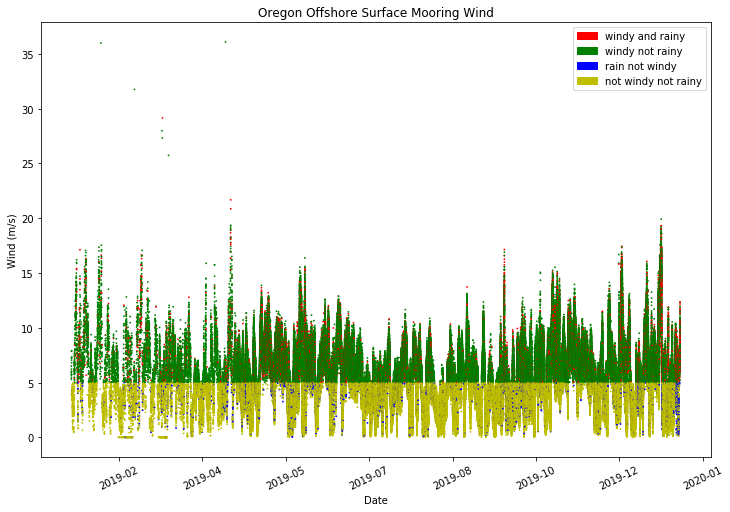

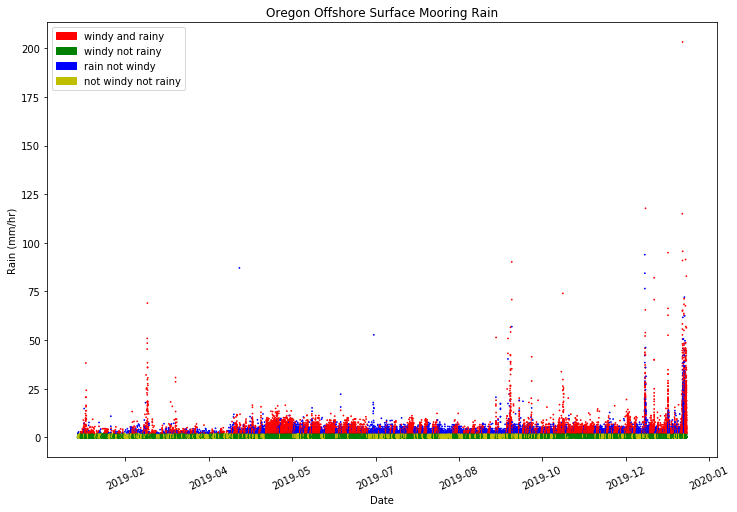

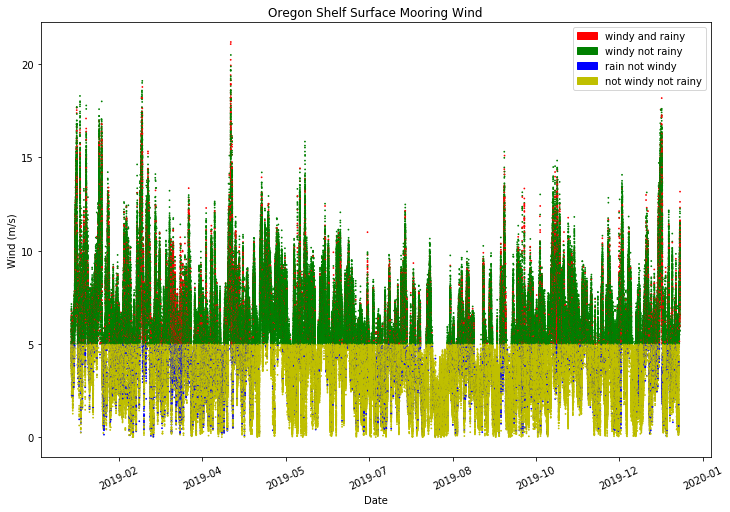

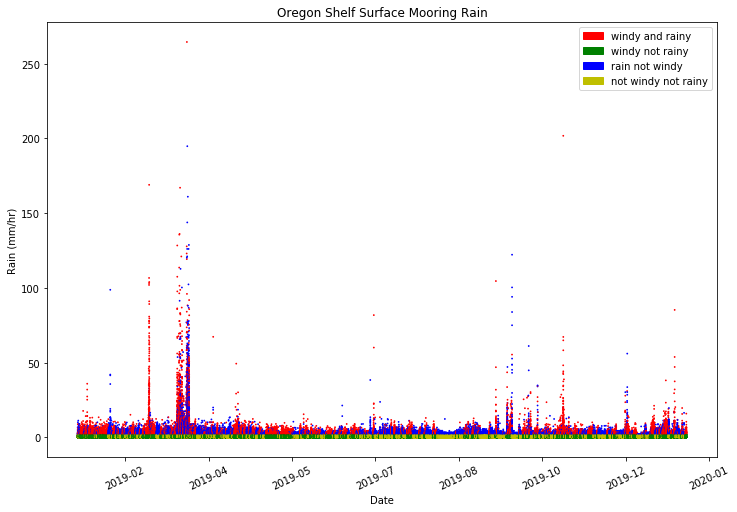

max correlation for wind is 0.28234291061450123 and at a lag of 210289 seconds
max correlation for rain is 0.15677366177952126 and at a lag of -9617 seconds


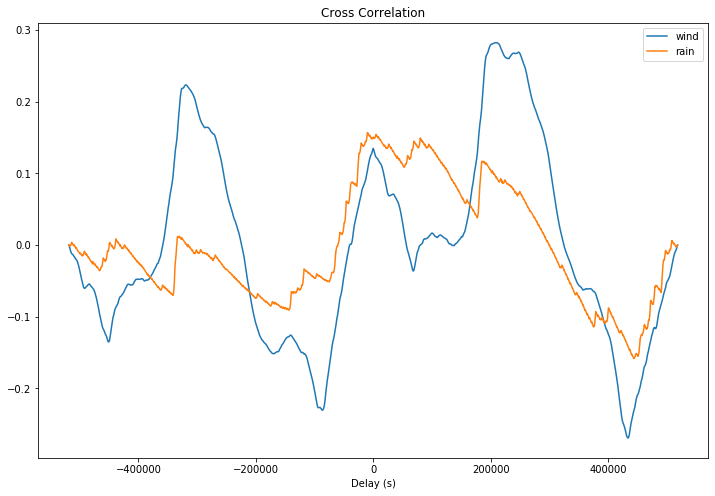

max average wind for Oregon Offshore Surface Mooring is 7.250562017427268 m/s and is in month  1
min average wind for Oregon Offshore Surface Mooring is 4.291064824454494 m/s and is in month  8
max average rain for Oregon Offshore Surface Mooring is 0.8086593464135482 mm/hr and is in month  5
min average rain for Oregon Offshore Surface Mooring is 0.4858685028653446 mm/hr and is in month  9
max average wind for Oregon Shelf Surface Mooring is 7.043990420105761 m/s and is in month  1
min average wind for Oregon Shelf Surface Mooring is 3.292483181185253 m/s and is in month  8
max average rain for Oregon Shelf Surface Mooring is 1.683255678168118 mm/hr and is in month  3
min average rain for Oregon Shelf Surface Mooring is 0.4108496782134957 mm/hr and is in month  6


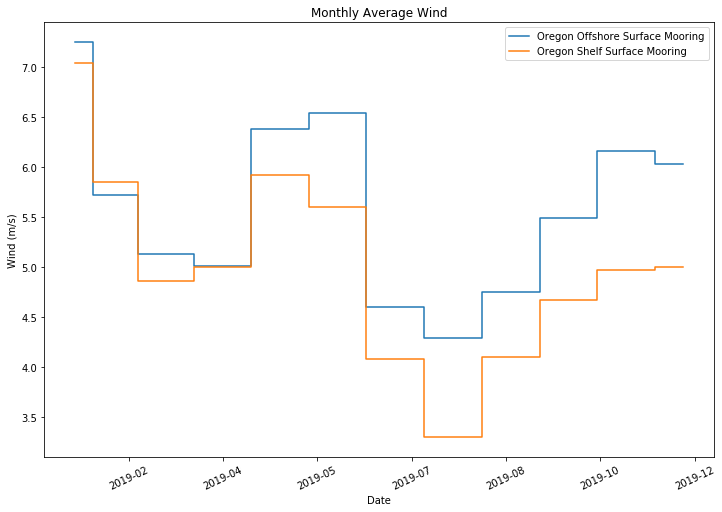

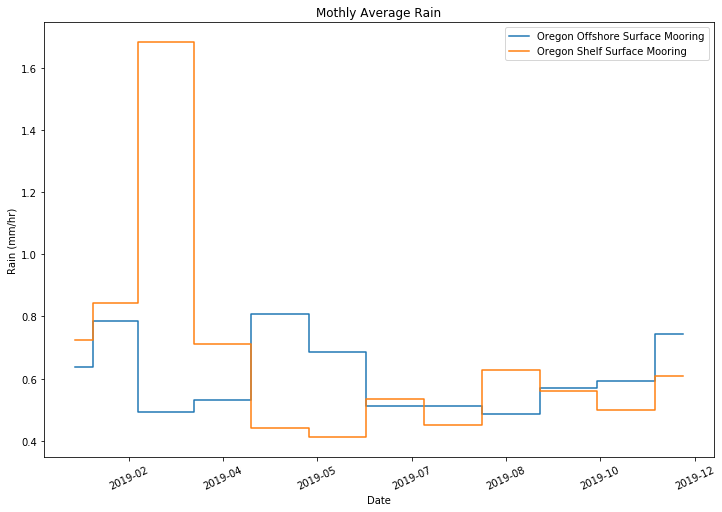

In [20]:
file_names = ['https://raw.githubusercontent.com/Jacobanderson42/Project2/master/Oregon%20Offshore%20Surface%20Mooring/',
              'https://raw.githubusercontent.com/Jacobanderson42/Project2/master/Oregon%20Shelf%20Surface%20Mooring/']
all_filenames =  [['deployment0007_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190101T003134-20190120T233941.csv', 
                   'deployment0007_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190121T003136-20190217T233924.csv', 
                   'deployment0007_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190218T003133-20190317T233936.csv', 
                   'deployment0007_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190318T003133-20190414T235934.csv', 
                   'deployment0007_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190415T000036-20190420T203722.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190610T000013-20190707T235906.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190708T000010-20190804T235930.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190513T000058-20190609T235910.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190902T000016-20190929T235941.csv', 
                   'deployment0009_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191021T174040-20191027T235941.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190930T000046-20191021T183508.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190420T201352-20190512T235954.csv', 
                   'deployment0008_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190805T000034-20190901T235911.csv', 
                   'deployment0009_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191028T000046-20191124T235914.csv', 
                   'deployment0009_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191223T000048-20191231T235952.csv', 
                   'deployment0009_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191125T000019-20191222T235944.csv'],
                  ['deployment0008_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190101T000036-20190120T235914.csv', 
                   'deployment0008_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190318T000103-20190414T235900.csv', 
                   'deployment0008_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190218T000003-20190317T235958.csv', 
                   'deployment0008_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190415T000005-20190421T003457.csv', 
                   'deployment0010_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191223T000020-20191231T235918.csv', 
                   'deployment0008_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190121T000018-20190217T235902.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190513T000040-20190609T235857.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190610T000001-20190707T235919.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190420T000053-20190512T235936.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190708T000024-20190804T235938.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190930T000040-20191022T123414.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190902T000013-20190929T235936.csv', 
                   'deployment0010_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191020T170022-20191027T235949.csv', 
                   'deployment0010_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191028T000050-20191124T235941.csv', 
                   'deployment0010_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20191125T000045-20191222T235916.csv', 
                   'deployment0009_CE02SHSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument_20190805T000042-20190901T235909.csv']]
rain_cutoff = 2
wind_cutoff = 5
start_date = '04/01/2019'
stop_date = '04/07/2019'
MetPlot(file_names,all_filenames,rain_cutoff,wind_cutoff)
MetCorr(file_names,all_filenames,start_date,stop_date)
MetAve(file_names,all_filenames)